# Project 2: 


- Werner Janse van Rensburg (577930) 
- Jo-Anne van der Wath (577394)
- Joshua Moll (578045)
- Omphile Tladi (577776)
- Chaleigh Storm (577716)
- Nontsikelelo Sharon Buhlungu (577878)

Link: https://github.com/Werriess/Amazon-Alexa-Customer-Sentiment-Review 


Website: https://amazon-alexa-customer-sentiment-review-4.onrender.com

## Milestone 1:


### Sentiment Analysis for Customer Reviews: 
Analyze customer reviews and sentiment data to categorize them as positive, negative, or neutral, providing
insights for businesses to improve customer satisfaction.


In [256]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
import re
import string
from collections import Counter
import contractions
from wordcloud import WordCloud

In [258]:
df = pd.read_csv('../data/amazon_alexa.tsv', sep= '\t')
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


<b><u>Check for missing values<u/><b/>
    


In [260]:
empty_values = df.isna().sum()
print(empty_values)

spaces_values = (df == ' ').sum()
print(spaces_values)

nan_values = df.isnull().sum()
print(nan_values)

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64
rating               0
date                 0
variation            0
verified_reviews    79
feedback             0
dtype: int64
rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64


In [261]:
df.shape

(3150, 5)

<b><u>Drop missing values<u/><b/>

In [264]:
df.dropna(inplace=True)

df = df[~(df == ' ').any(axis=1)]

df = df[df.astype(str).applymap(lambda x: x.strip() != '')]

df.reset_index(drop=True, inplace=True)

print(df)

      rating       date         variation  \
0          5  31-Jul-18  Charcoal Fabric    
1          5  31-Jul-18  Charcoal Fabric    
2          4  31-Jul-18    Walnut Finish    
3          5  31-Jul-18  Charcoal Fabric    
4          5  31-Jul-18  Charcoal Fabric    
...      ...        ...               ...   
3065       5  30-Jul-18        Black  Dot   
3066       5  30-Jul-18        Black  Dot   
3067       5  30-Jul-18        Black  Dot   
3068       5  30-Jul-18        White  Dot   
3069       4  29-Jul-18        Black  Dot   

                                       verified_reviews  feedback  
0                                         Love my Echo!         1  
1                                             Loved it!         1  
2     Sometimes while playing a game, you can answer...         1  
3     I have had a lot of fun with this thing. My 4 ...         1  
4                                                 Music         1  
...                                                

C:\Users\werne\AppData\Local\Temp\ipykernel_22192\964563323.py:5: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



<b><u>Check if dropped<u/><b/>

In [266]:
empty_values = df.isna().sum()
spaces_values = (df == ' ').sum()
nan_values = df.isnull().sum()

print(empty_values)
print(spaces_values)
print(nan_values)

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64
rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64
rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64


In [267]:
df.shape

(3070, 5)

<b><u>Count number of words in each sentence<u/><b/>

In [270]:
df['Word Count'] = df['verified_reviews'].apply(lambda x: len(x.split()))
df

,rating,date,variation,verified_reviews,feedback,Word Count
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,3
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,2
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,38
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,34
4,5,31-Jul-18,Charcoal Fabric,Music,1,1
...,...,...,...,...,...,...
3065,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,8
3066,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,23
3067,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,83
3068,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,76


C:\Users\werne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



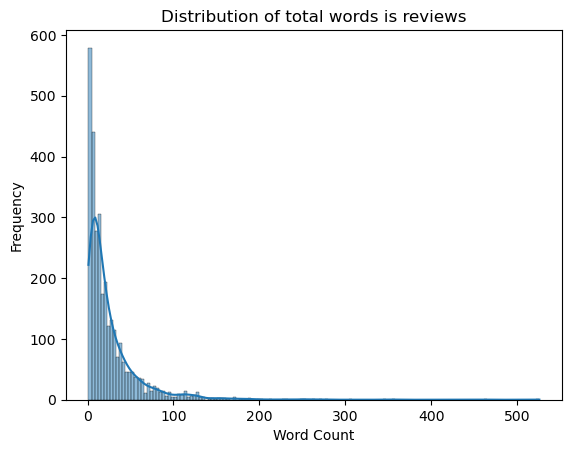

In [271]:
sns.histplot(df['Word Count'], kde=True)
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of total words is reviews')
plt.show()

<b><u>Check outliers<u/><b/>

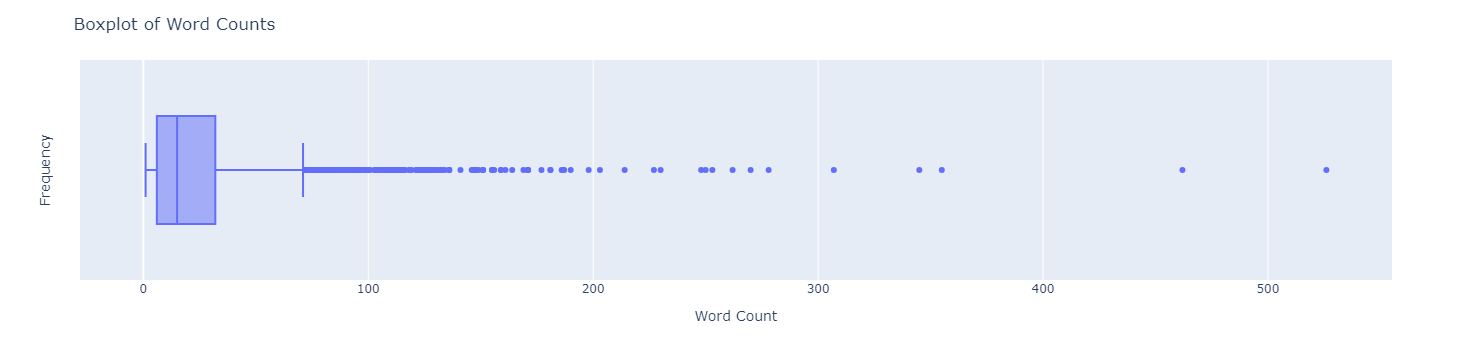

In [273]:
fig = px.box(df, x='Word Count', hover_data={'Word Count': True})

fig.update_layout(
    title='Boxplot of Word Counts',
    xaxis_title='Word Count',
    yaxis_title='Frequency'
)

fig.show()

<b><u>Remove outliers<u/><b/>

In [276]:
df_filtered = df[df['Word Count']  <= 71]
df_filtered

,rating,date,variation,verified_reviews,feedback,Word Count
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,3
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,2
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,38
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,34
4,5,31-Jul-18,Charcoal Fabric,Music,1,1
...,...,...,...,...,...,...
3063,5,30-Jul-18,Black Dot,Awesome device wish I bought one ages ago.,1,8
3064,5,30-Jul-18,Black Dot,love it,1,2
3065,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,8
3066,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,23


<b><u>New distribution<u/><b/>

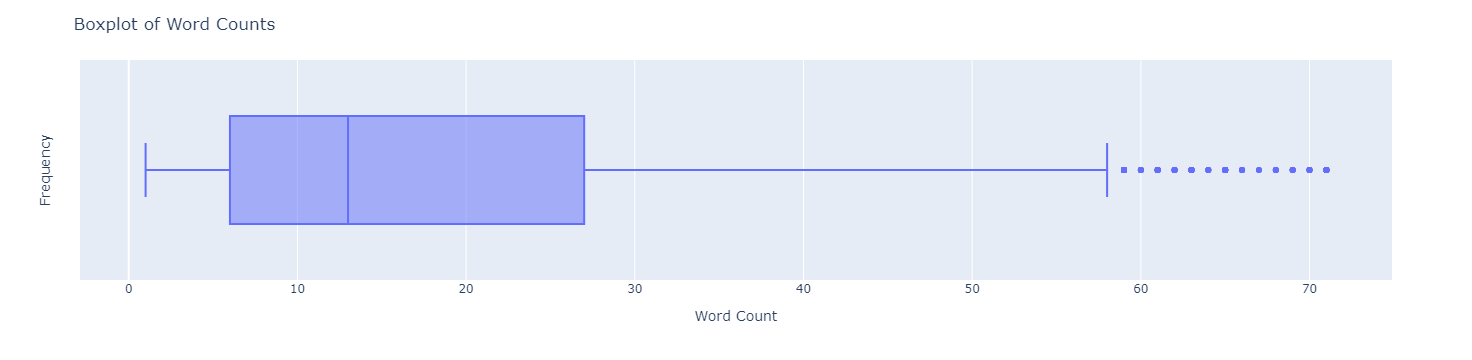

In [278]:
fig = px.box(df_filtered, x='Word Count', hover_data={'Word Count': True})

fig.update_layout(
    title='Boxplot of Word Counts',
    xaxis_title='Word Count',
    yaxis_title='Frequency'
)

fig.show()

C:\Users\werne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



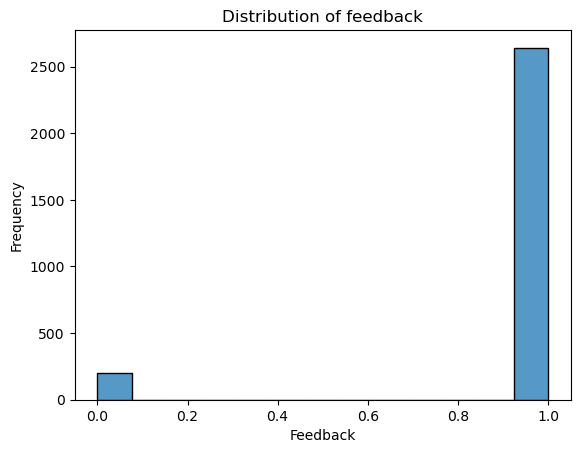

In [279]:
sns.histplot(df_filtered['feedback'])
plt.xlabel('Feedback')
plt.ylabel('Frequency')
plt.title('Distribution of feedback')
plt.show()

Based on this graph we can see there is a class imbalance that needs to be treated

In [283]:
#We are going to add our data to an array
feedback_data = []

for text in df_filtered['verified_reviews']:
    feedback_data.append(text)
" ".join(feedback_data[:5])

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music'

### Text to lower

In [286]:
text_lower = [text.lower() for text in feedback_data]
" ".join(text_lower[:5])

'love my echo! loved it! sometimes while playing a game, you can answer a question correctly but alexa says you got it wrong and answers the same as you.  i like being able to turn lights on and off while away from home. i have had a lot of fun with this thing. my 4 yr old learns about dinosaurs, i control the lights and play games like categories. has nice sound when playing music as well. music'

### Remove punctuation

In [288]:
text_without_punctuation = [''.join(char for char in text if char not in string.punctuation) for text in text_lower]  
" ".join(text_without_punctuation)   
text_without_punctuation[:5]

['love my echo',
 'loved it',
 'sometimes while playing a game you can answer a question correctly but alexa says you got it wrong and answers the same as you  i like being able to turn lights on and off while away from home',
 'i have had a lot of fun with this thing my 4 yr old learns about dinosaurs i control the lights and play games like categories has nice sound when playing music as well',
 'music']

### Tokenize

In [290]:
tokenized_data = [nltk.word_tokenize(text) for text in text_without_punctuation]
tokenized_data[:5]

[['love', 'my', 'echo'],
 ['loved', 'it'],
 ['sometimes',
  'while',
  'playing',
  'a',
  'game',
  'you',
  'can',
  'answer',
  'a',
  'question',
  'correctly',
  'but',
  'alexa',
  'says',
  'you',
  'got',
  'it',
  'wrong',
  'and',
  'answers',
  'the',
  'same',
  'as',
  'you',
  'i',
  'like',
  'being',
  'able',
  'to',
  'turn',
  'lights',
  'on',
  'and',
  'off',
  'while',
  'away',
  'from',
  'home'],
 ['i',
  'have',
  'had',
  'a',
  'lot',
  'of',
  'fun',
  'with',
  'this',
  'thing',
  'my',
  '4',
  'yr',
  'old',
  'learns',
  'about',
  'dinosaurs',
  'i',
  'control',
  'the',
  'lights',
  'and',
  'play',
  'games',
  'like',
  'categories',
  'has',
  'nice',
  'sound',
  'when',
  'playing',
  'music',
  'as',
  'well'],
 ['music']]

### Stopwords

In [292]:
english_stopwords = set(stopwords.words('english'))

In [293]:
filtered_data = [[word for word in text if word not in english_stopwords] for text in tokenized_data]
filtered_data[:5]

[['love', 'echo'],
 ['loved'],
 ['sometimes',
  'playing',
  'game',
  'answer',
  'question',
  'correctly',
  'alexa',
  'says',
  'got',
  'wrong',
  'answers',
  'like',
  'able',
  'turn',
  'lights',
  'away',
  'home'],
 ['lot',
  'fun',
  'thing',
  '4',
  'yr',
  'old',
  'learns',
  'dinosaurs',
  'control',
  'lights',
  'play',
  'games',
  'like',
  'categories',
  'nice',
  'sound',
  'playing',
  'music',
  'well'],
 ['music']]

### Lemmatizer

In [296]:
lm = WordNetLemmatizer()

lemmatized_text = [[lm.lemmatize(word) for word in text] for text in filtered_data]
lemmatized_text[:5]

[['love', 'echo'],
 ['loved'],
 ['sometimes',
  'playing',
  'game',
  'answer',
  'question',
  'correctly',
  'alexa',
  'say',
  'got',
  'wrong',
  'answer',
  'like',
  'able',
  'turn',
  'light',
  'away',
  'home'],
 ['lot',
  'fun',
  'thing',
  '4',
  'yr',
  'old',
  'learns',
  'dinosaur',
  'control',
  'light',
  'play',
  'game',
  'like',
  'category',
  'nice',
  'sound',
  'playing',
  'music',
  'well'],
 ['music']]

### Stemmer

In [298]:
stemmer = PorterStemmer()
stemmed_text= [[stemmer.stem(word) for word in text] for text in lemmatized_text]
stemmed_text[:5]

[['love', 'echo'],
 ['love'],
 ['sometim',
  'play',
  'game',
  'answer',
  'question',
  'correctli',
  'alexa',
  'say',
  'got',
  'wrong',
  'answer',
  'like',
  'abl',
  'turn',
  'light',
  'away',
  'home'],
 ['lot',
  'fun',
  'thing',
  '4',
  'yr',
  'old',
  'learn',
  'dinosaur',
  'control',
  'light',
  'play',
  'game',
  'like',
  'categori',
  'nice',
  'sound',
  'play',
  'music',
  'well'],
 ['music']]

In [299]:
vocabulary = set([word for text in stemmed_text for word in text])

In [300]:
pre = ' '.join(vocabulary)
pre

'yeah divers scream kasacam stickeasi explor spec repertoir fortun beyond lost u fanat pickup mama pleasedsimpl greatwith begun soft newest fi antitechnolog told pair older found your coolest major housedo 7900 puzzl alex price refurbishedthought previous whenif homework anywher try34 cumbersom ban part bar island introduct everybodi despit ❤ length depreci uhyour headphon young nearli basebal center extend careless mood stage rather knee invent pizza gave walk accuraci mid greatit girl start muffl alread eh speaktak govern uniqu dissatisfact alexia smooth thete stole adequ fulli indoor lack enrol today select philli buyw spotthen worst wellintegr facetim nexia thong option fingertip viceo someon vacuum counti expert sold clockradio dhiw orchestra dress prettier sight philip goo prove disturb difficulti ok nite downfal dumber routin savi ridicul flash laptop desk row via sm reauthor output crunchyrol fact cualquier silver argu person refurb die money samsunggalaxi must zwave recipi res

In [301]:
def remove_emojis(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002500-\U00002BEF"  
                           u"\U00002702-\U000027B0"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           u"\u2640-\u2642"
                           u"\u2600-\u2B55"
                           u"\u200d"
                           u"\u23cf"
                           u"\u23e9"
                           u"\u231a"
                           u"\ufe0f"  
                           u"\u3030"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

text_without_emojis = remove_emojis(pre)
text_without_emojis

'yeah divers scream kasacam stickeasi explor spec repertoir fortun beyond lost u fanat pickup mama pleasedsimpl greatwith begun soft newest fi antitechnolog told pair older found your coolest major housedo 7900 puzzl alex price refurbishedthought previous whenif homework anywher try34 cumbersom ban part bar island introduct everybodi despit  length depreci uhyour headphon young nearli basebal center extend careless mood stage rather knee invent pizza gave walk accuraci mid greatit girl start muffl alread eh speaktak govern uniqu dissatisfact alexia smooth thete stole adequ fulli indoor lack enrol today select philli buyw spotthen worst wellintegr facetim nexia thong option fingertip viceo someon vacuum counti expert sold clockradio dhiw orchestra dress prettier sight philip goo prove disturb difficulti ok nite downfal dumber routin savi ridicul flash laptop desk row via sm reauthor output crunchyrol fact cualquier silver argu person refurb die money samsunggalaxi must zwave recipi rest

### Preprocess data

In [304]:
def negate_sequence(text):
    negation = False
    delims = "?.,!:;"
    result = []
    words = text.split() 
    for word in words:
        stripped = word.strip(delims).lower()
        if any(neg in stripped for neg in ["not", "n't", "no"]):
            negation = not negation
            continue
        if negation:
            negated = "not_" + stripped
        else:
            negated = stripped
        result.append(negated)
        if any(c in word for c in delims):
            negation = False
    return result

def process(text):
    text = text.lower()
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    def remove_emojis(text):
        emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002500-\U00002BEF"  
                           u"\U00002702-\U000027B0"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           u"\u2640-\u2642"
                           u"\u2600-\u2B55"
                           u"\u200d"
                           u"\u23cf"
                           u"\u23e9"
                           u"\u231a"
                           u"\ufe0f"  
                           u"\u3030"
                           "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)
    
    text = remove_emojis(text)
    
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    
    text = contractions.fix(text)
    
    tokens = negate_sequence(text)
    
    lemmatizer = WordNetLemmatizer()
    
    stop_words = set(stopwords.words('english'))
    
    lemmatized_tokens = []
    
    for token in tokens:
        if token in stop_words:
            continue
        
        lemma = lemmatizer.lemmatize(token)
        lemmatized_tokens.append(lemma)
        
    processed_text = ' '.join(lemmatized_tokens)
    
    return processed_text

In [305]:
df_filtered['verified_reviews'] = df_filtered['verified_reviews'].apply(process)
df_filtered 

C:\Users\werne\AppData\Local\Temp\ipykernel_22192\112923612.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,rating,date,variation,verified_reviews,feedback,Word Count
0,5,31-Jul-18,Charcoal Fabric,love echo,1,3
1,5,31-Jul-18,Charcoal Fabric,loved,1,2
2,4,31-Jul-18,Walnut Finish,sometimes playing game answer question correct...,1,38
3,5,31-Jul-18,Charcoal Fabric,lot fun thing 4 yr old learns not_i not_contro...,1,34
4,5,31-Jul-18,Charcoal Fabric,music,1,1
...,...,...,...,...,...,...
3063,5,30-Jul-18,Black Dot,awesome device wish bought one age ago,1,8
3064,5,30-Jul-18,Black Dot,love,1,2
3065,5,30-Jul-18,Black Dot,perfect kid adult everyone,1,8
3066,5,30-Jul-18,Black Dot,listening music searching location checking ti...,1,23


In [306]:
sid = SentimentIntensityAnalyzer()

sentiments = df_filtered['verified_reviews'].apply(
    lambda x: sid.polarity_scores(x)['compound']
)
sentiments

0       0.6369
1       0.5994
2       0.0516
3       0.5106
4       0.0000
         ...  
3063    0.7783
3064    0.6369
3065    0.5719
3066    0.0000
3069    0.4404
Name: verified_reviews, Length: 2838, dtype: float64

In [307]:
sentiment_class = sentiments.apply(
    lambda x: 'positive' if x > 0 else ('neutral' if x == 0 else 'negative')
)

In [308]:
df_with_sentiment = pd.DataFrame({
    'Rating': df_filtered['rating'],
    'Review': df_filtered['verified_reviews'], 
     'Sentiment': sentiment_class
})

df_with_sentiment

,Rating,Review,Sentiment
0,5,love echo,positive
1,5,loved,positive
2,4,sometimes playing game answer question correct...,positive
3,5,lot fun thing 4 yr old learns not_i not_contro...,positive
4,5,music,neutral
...,...,...,...
3063,5,awesome device wish bought one age ago,positive
3064,5,love,positive
3065,5,perfect kid adult everyone,positive
3066,5,listening music searching location checking ti...,neutral


In [309]:
df_with_sentiment['Sentiment'] = df_with_sentiment['Rating'].apply(lambda x: 1 if x > 3 else 0 if x == 3 else -1)

df_with_sentiment

,Rating,Review,Sentiment
0,5,love echo,1
1,5,loved,1
2,4,sometimes playing game answer question correct...,1
3,5,lot fun thing 4 yr old learns not_i not_contro...,1
4,5,music,1
...,...,...,...
3063,5,awesome device wish bought one age ago,1
3064,5,love,1
3065,5,perfect kid adult everyone,1
3066,5,listening music searching location checking ti...,1


# Milestone 2: 

### Visualize class imbalance

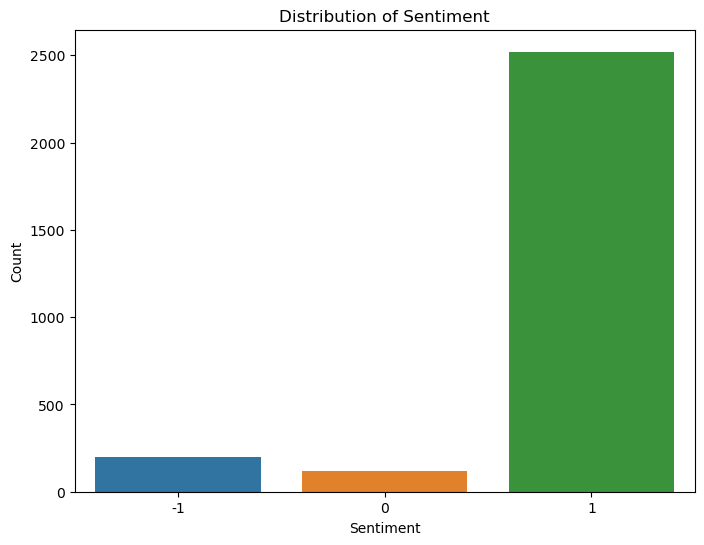

In [312]:
import seaborn as sns
import matplotlib.pyplot as plt

sentiment_counts = df_with_sentiment['Sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

### Most used words

In [314]:
positiveWords = nltk.FreqDist(word for text in df_with_sentiment[df_with_sentiment["Sentiment"] == 1]["Review"] for word in text.lower().split())
negativeWords = nltk.FreqDist(word  for text in df_with_sentiment[df_with_sentiment["Sentiment"] == -1]["Review"] for word in text.lower().split())
neutralWords = nltk.FreqDist(word  for text in df_with_sentiment[df_with_sentiment["Sentiment"] == 0]["Review"] for word in text.lower().split())

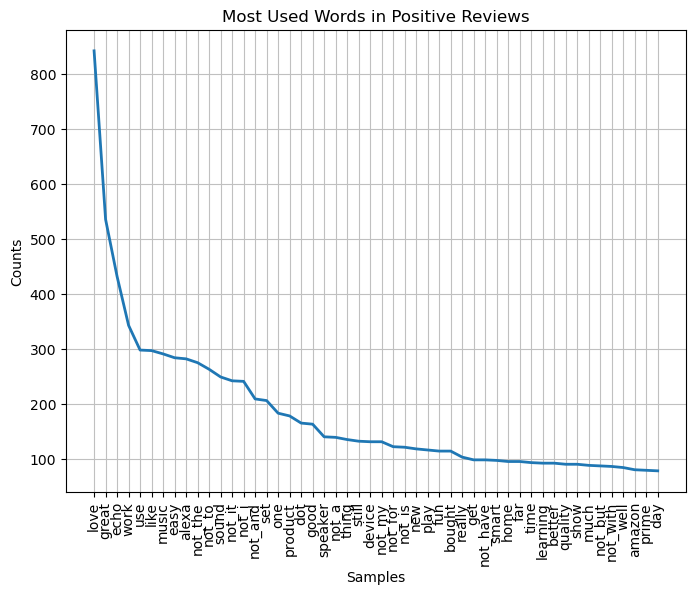

In [316]:
plt.subplots(figsize=(8,6))
plt.title("Most Used Words in Positive Reviews")
positiveWords.plot(50)
plt.show()

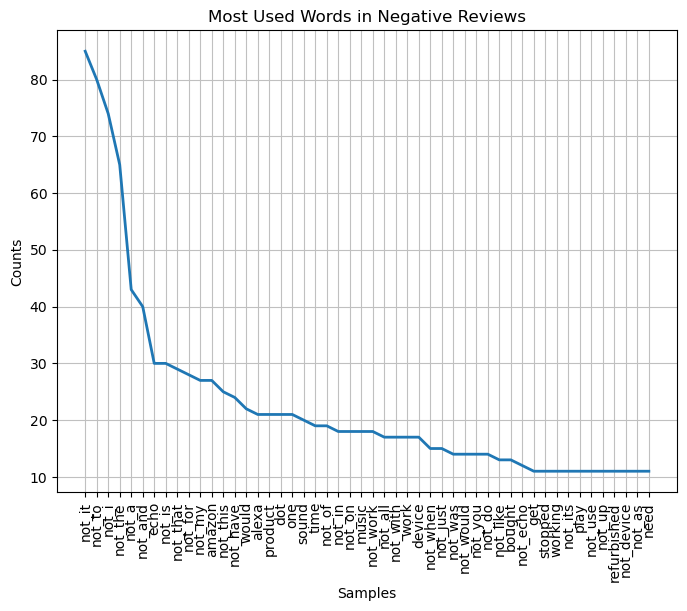

In [317]:
plt.subplots(figsize=(8,6))
plt.title("Most Used Words in Negative Reviews")
negativeWords.plot(50)
plt.show()

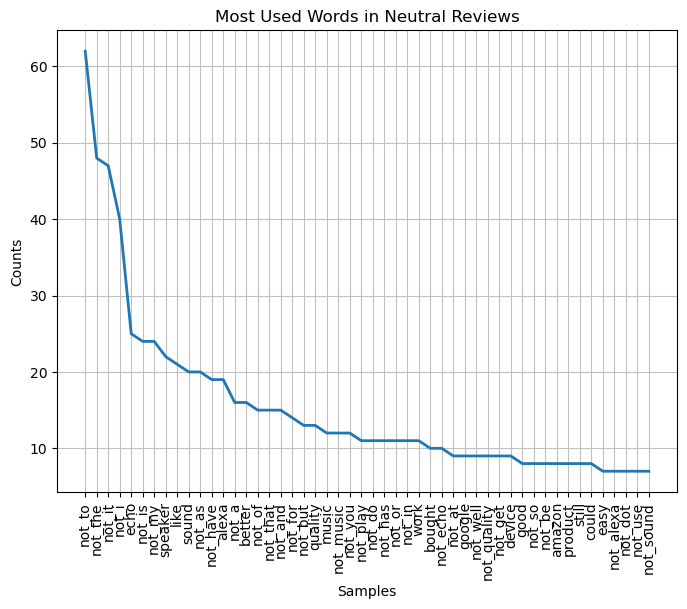

In [318]:
plt.subplots(figsize=(8,6))
plt.title("Most Used Words in Neutral Reviews")
neutralWords.plot(50)
plt.show()

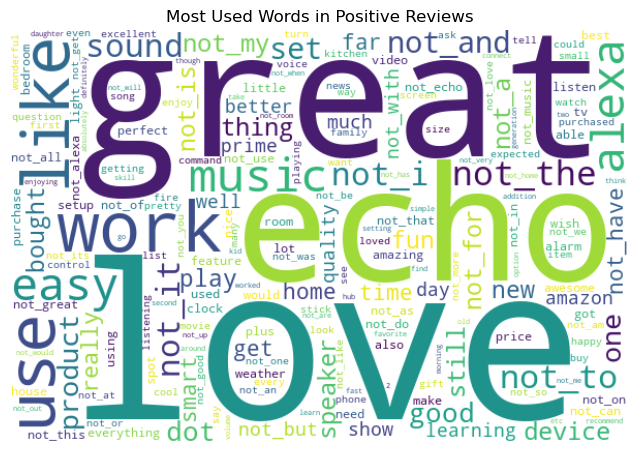

In [319]:
wordcloud = WordCloud(width=600, height=400, background_color='white').generate_from_frequencies(positiveWords)

plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Most Used Words in Positive Reviews")
plt.axis('off')  
plt.show()

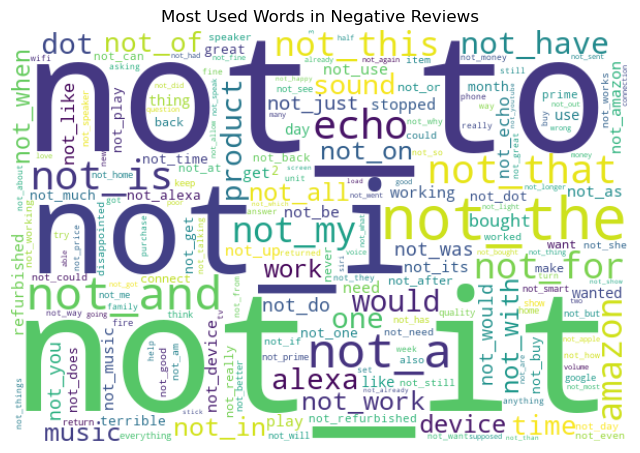

In [320]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=600, height=400, background_color='white').generate_from_frequencies(negativeWords)

plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Most Used Words in Negative Reviews")
plt.axis('off')  
plt.show()

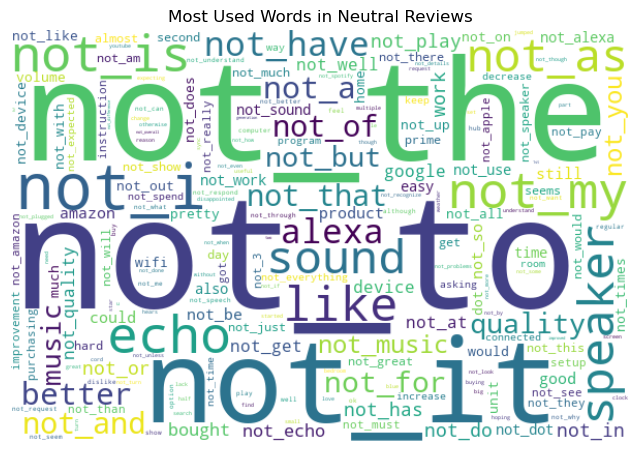

In [322]:
wordcloud = WordCloud(width=600, height=400, background_color='white').generate_from_frequencies(neutralWords)

plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Most Used Words in Neutral Reviews")
plt.axis('off')  
plt.show()

In [323]:
df_with_sentiment

,Rating,Review,Sentiment
0,5,love echo,1
1,5,loved,1
2,4,sometimes playing game answer question correct...,1
3,5,lot fun thing 4 yr old learns not_i not_contro...,1
4,5,music,1
...,...,...,...
3063,5,awesome device wish bought one age ago,1
3064,5,love,1
3065,5,perfect kid adult everyone,1
3066,5,listening music searching location checking ti...,1


# SVM Model


In [334]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
import joblib

X = df_with_sentiment[['Review']]  
y = df_with_sentiment['Sentiment']

oversampler = RandomOverSampler()

X_resampled, y_resampled = oversampler.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train['Review']) 
X_test_vectorized = vectorizer.transform(X_test['Review'])        

svm_model = SVC(kernel='linear')  
svm_model.fit(X_train_vectorized, y_train)
joblib.dump(svm_model, '../artifacts/model1.pkl')

y_pred = svm_model.predict(X_test_vectorized)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

          -1       0.98      1.00      0.99       512
           0       0.99      1.00      0.99       472
           1       1.00      0.98      0.99       529

    accuracy                           0.99      1513
   macro avg       0.99      0.99      0.99      1513
weighted avg       0.99      0.99      0.99      1513



## Confusion matrix

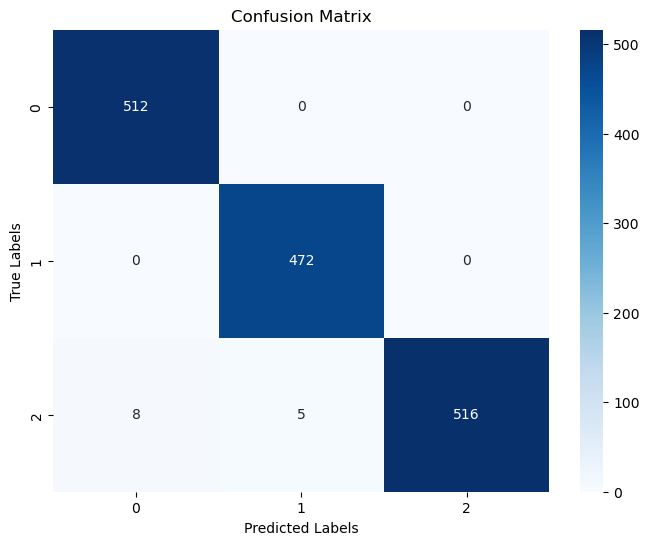

In [341]:
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(c_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Naive Bayes Model

In [364]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
import joblib

X = df_with_sentiment[['Review']]  
y = df_with_sentiment['Sentiment']

oversampler = RandomOverSampler()
X_resampled, y_resampled = oversampler.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train['Review']) 
X_test_vectorized = vectorizer.transform(X_test['Review'])
joblib.dump(vectorizer, '../artifacts/vectorizer2.pkl')

nb_model = MultinomialNB()  
nb_model.fit(X_train_vectorized, y_train)
joblib.dump(nb_model, '../artifacts/model2.pkl')

pred = nb_model.predict(X_test_vectorized)

print("Classification Report:")
print(classification_report(y_test, pred))

Classification Report:
              precision    recall  f1-score   support

          -1       0.94      0.99      0.96       512
           0       0.93      0.98      0.95       472
           1       0.98      0.88      0.93       529

    accuracy                           0.95      1513
   macro avg       0.95      0.95      0.95      1513
weighted avg       0.95      0.95      0.95      1513



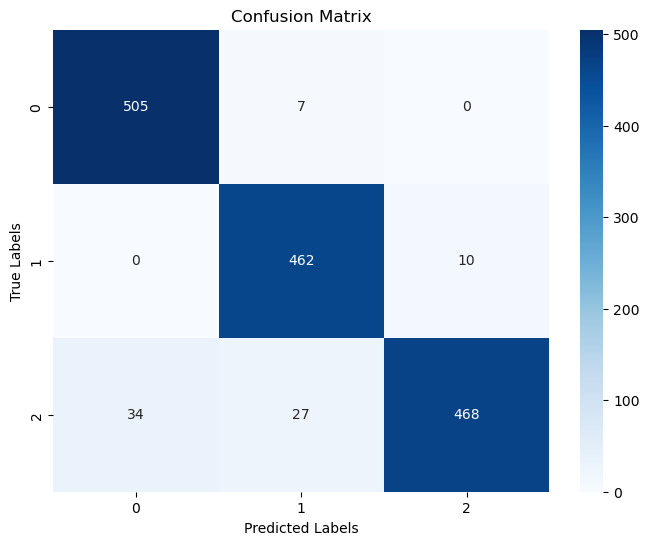

In [345]:
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(y_test, pred)

plt.figure(figsize=(8, 6))
sns.heatmap(c_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Test outputs for SVM

In [351]:
def negate_sequence(text):
    negation = False
    delims = "?.,!:;"
    result = []
    words = text.split()
    prev = None
    pprev = None
    for word in words:
        stripped = word.strip(delims).lower()
        negated = "not_" + stripped if negation else stripped
        result.append(negated)
        if prev:
            bigram = prev + " " + negated
            result.append(bigram)
            if pprev:
                trigram = pprev + " " + bigram
                result.append(trigram)
            pprev = prev
        prev = negated

        if any(neg in word for neg in ["not", "n't", "no"]):
            negation = not negation

        if any(c in word for c in delims):
            negation = False

    return result

def process(text):
    
    text = text.lower()
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    def remove_emojis(text):
        emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002500-\U00002BEF"  
                           u"\U00002702-\U000027B0"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           u"\u2640-\u2642"
                           u"\u2600-\u2B55"
                           u"\u200d"
                           u"\u23cf"
                           u"\u23e9"
                           u"\u231a"
                           u"\ufe0f"  
                           u"\u3030"
                           "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)
    
    text = remove_emojis(text)
    
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    
    text = contractions.fix(text)
    
    tokens = negate_sequence(text)
    
    lemmatizer = WordNetLemmatizer()
    
    stop_words = set(stopwords.words('english'))
    
    lemmatized_tokens = []
    
    for token in tokens:
        if token in stop_words:
            continue
        
        lemma = lemmatizer.lemmatize(token)
        lemmatized_tokens.append(lemma)
        
    processed_text = ' '.join(lemmatized_tokens)
    
    return processed_text

your_text = "Bad"
processed_text = process(your_text)

vectorized_text = vectorizer.transform([processed_text])

model = joblib.load('../artifacts/model1.pkl')

predicted_sentiment = model.predict(vectorized_text)[0]

if predicted_sentiment == -1:
    print("Negative Sentiment")
elif predicted_sentiment == 0:
    print("Neutral Sentiment")
else:
    print("Positive Sentiment")

Negative Sentiment


### Test output for Naive Bayes

In [358]:
def negate_sequence(text):
    negation = False
    delims = "?.,!:;"
    result = []
    words = text.split()
    prev = None
    pprev = None
    for word in words:
        stripped = word.strip(delims).lower()
        negated = "not_" + stripped if negation else stripped
        result.append(negated)
        if prev:
            bigram = prev + " " + negated
            result.append(bigram)
            if pprev:
                trigram = pprev + " " + bigram
                result.append(trigram)
            pprev = prev
        prev = negated

        if any(neg in word for neg in ["not", "n't", "no"]):
            negation = not negation

        if any(c in word for c in delims):
            negation = False

    return result

def process(text):

    text = text.lower()
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    def remove_emojis(text):
        emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002500-\U00002BEF"  
                           u"\U00002702-\U000027B0"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           u"\u2640-\u2642"
                           u"\u2600-\u2B55"
                           u"\u200d"
                           u"\u23cf"
                           u"\u23e9"
                           u"\u231a"
                           u"\ufe0f"  
                           u"\u3030"
                           "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)
    
    text = remove_emojis(text)
    
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    
    text = contractions.fix(text)
    
    tokens = negate_sequence(text)
    
    lemmatizer = WordNetLemmatizer()
    
    stop_words = set(stopwords.words('english'))
    
    lemmatized_tokens = []
    
    for token in tokens:
        if token in stop_words:
            continue
        
        lemma = lemmatizer.lemmatize(token)
        lemmatized_tokens.append(lemma)
        
    processed_text = ' '.join(lemmatized_tokens)
    
    return processed_text


your_text = "Won't but this horrible product ever again"
processed_text = process(your_text)

vectorized_text = vectorizer.transform([processed_text])

model2 = joblib.load('../artifacts/model2.pkl')

predicted_sentiment = model2.predict(vectorized_text)[0]

if predicted_sentiment == -1:
    print("Negative Sentiment")
elif predicted_sentiment == 0:
    print("Neutral Sentiment")
else:
    print("Positive Sentiment")

Negative Sentiment


# Milestone 3

### Web Application

In [362]:
import dash
from dash import html, dcc, Input, Output, State
import pandas as pd
import joblib
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import string
import contractions
import dash_table


model = joblib.load("../artifacts/model2.pkl")

app = dash.Dash(__name__)
server = app.server

df = pd.read_csv('../data/validation_data.csv')

columns = [{"name": i, "id": i} for i in df.columns]

variation_options = [
    {'label': 'Charcoal Fabric', 'value': 'charcoal_fabric'},
    {'label': 'Walnut Finish', 'value': 'walnut_finish'},
    {'label': 'Heather Gray Fabric', 'value': 'heather_gray_fabric'},
    {'label': 'Sandstone Fabric', 'value': 'sandstone_fabric'},
    {'label': 'Oak Finish', 'value': 'oak_finish'},
    {'label': 'Black', 'value': 'black'},
    {'label': 'White', 'value': 'white'},
    {'label': 'Black Spot', 'value': 'black_spot'},
    {'label': 'White Spot', 'value': 'white_spot'},
    {'label': 'Black Show', 'value': 'black_show'},
    {'label': 'White Show', 'value': 'white_show'},
    {'label': 'Black Plus', 'value': 'black_plus'},
    {'label': 'White Plus', 'value': 'white_plus'},
    {'label': 'Configuration: Fire TV Stick', 'value': 'fire_tv_stick'},
    {'label': 'Black Dot', 'value': 'black_dot'},
    {'label': 'White Dot', 'value': 'white_dot'}
]

app.layout = html.Div(
    className='app-container', 
    style = {'background-color' : '#1d7874'},
    children=[
        html.H1('Amazon Alexa Review',
            style={ 'padding': '10px 20px',
                        'margin-top': '20px',
                        'font-family': 'calibri',
                        'font-weight': '600',
                        'font-size':'2em',
                        'color': '#071e22',
                        'width': '500px',
                        'text-align': 'center'}),
        html.Div( 
            className='content',
            style = {'background-color' : '#071e22',
                    'color': 'white',
                    'width':'200',
                    'font-family':'calibri',
                    'padding':'50px'},
            children=[
                html.Div([
                    html.Label('Rating', style={'display': 'block', 
                                                'margin-left': '25px',
                                                'font-size':'20px'}),
                    dcc.Slider(
                        id='rating-slider',
                        min=1,
                        max=5,
                        step=1,
                        value=3, 
                        marks={i: str(i) for i in range(1, 6)},
                    )
                ], className='rating-container',
                style={'width':'500px'}), 
                html.Div([
                    html.Label('Date', style={'display': 'block',
                                                'margin-left': '25px',
                                                'font-size':'20px'}),
                    dcc.DatePickerSingle(
                        id='date-picker',
                        date=None,
                        style={'margin-left': '25px'}
                    )
                ], className='date-container'), 
                html.Div([
                    html.Div([
                        html.Label('Variation', style={'display': 'block',
                                                        'margin-top':'20px',
                                                'margin-left': '25px',
                                                'color': 'white',
                                                'font-size':'20px'}),
                        dcc.Dropdown(
                            id='variation-dropdown',
                            options=variation_options,
                            value=None,
                            style={'margin-left': '13px', 'width': '465px', 'height': '50px', 'font-size':'22px', 'color': '#071e22'}
                        )
                    ], className='variation-container'),  
                    html.Div([
                        html.Label('Review', style={'display':'block',
                                                    'margin-top':'20px',
                                                    'margin-left': '25px',
                                                'font-size':'20px'}),
                        dcc.Textarea(
                            id='review-text',
                            value='',
                            style={'margin-left':'25px',
                                    'width':'460px',
                                    'height': '150px',
                                    'font-size':'large',
                                    'color':'#071e22'}
                        )
                    ], className='review-container'),  
                    html.Button('Submit', 
                                id='submit-val', 
                                n_clicks=0,
                                style={'background-color': '#1d7874',
                                        'color': 'white',
                                        'padding': '10px',
                                        'border': '1px solid transparent',
                                        'border-radius' : '10px',
                                        'margin-top':'10px',
                                        'margin-left':'25px'}),
                    html.Div(id='output-div')
                ], className='review-section'),
                html.Div([
                    html.H3('Amazon Reviews'),
                    html.Div(
                        dcc.Loading(
                            id='loading-table',
                            type='circle',
                            children=[
                                html.Div(
                                    dash_table.DataTable(
                                        id='review-table',
                                        columns=columns,
                                        data=df.to_dict('records'),
                                        page_size=10,  
                                        style_table={'overflowX': 'auto'},  
                                        style_cell={'minWidth': '150px', 'width': '150px', 'maxWidth': '150px'},  
                                        style_header={'backgroundColor': 'rgb(30, 30, 30)', 'color': 'white'},  
                                        style_data={'backgroundColor': 'rgb(50, 50, 50)', 'color': 'white'},  
                                        row_selectable='single',  
                                        selected_rows=[]  
                                    )
                                )
                            ]
                        )
                    )
                ], style={'overflowY': 'auto', 'height': '250px', 'margin-top': '20px', 'margin-left': '25px'})
            ]
        )
    ]
)

@app.callback(
    Output(component_id='rating-slider', component_property='value'),
    Output(component_id='date-picker', component_property='date'),
    Output(component_id='variation-dropdown', component_property='value'),
    Output(component_id='review-text', component_property='value'),
    Input(component_id='review-table', component_property='selected_rows'),
    State(component_id='review-table', component_property='data')
)
def update_inputs(selected_rows, data):
    if selected_rows:
        selected_row_index = selected_rows[0]
        selected_row = data[selected_row_index]
        rating = selected_row['rating']
        date = selected_row['date']
        variation = selected_row['variation']
        review = selected_row['verified_reviews']
        return rating, date, variation, review
    else:
        return 3, None, None, ''

@app.callback(
    Output(component_id='output-div', component_property='children'),
    Input(component_id='submit-val', component_property='n_clicks'),
    State('review-text', 'value')
)
def update_output(n_clicks, review_text):
    if n_clicks > 0 and review_text:  
        processed_text = process(review_text)

        vectorized_text = vectorizer.transform([processed_text])

        predicted_sentiment = model.predict(vectorized_text)[0]

        if predicted_sentiment == -1:
            sentiment = "Negative Sentiment"
        elif predicted_sentiment == 0:
            sentiment = "Neutral Sentiment"
        else:
            sentiment = "Positive Sentiment"  

        return html.Div([
            html.H3("Predicted Sentiment:"),
            html.P(sentiment)
        ])
    else:
        return None  

def negate_sequence(text):
    negation = False
    delims = "?.,!:;"
    result = []
    words = text.split()
    prev = None
    pprev = None
    for word in words:
        stripped = word.strip(delims).lower()
        negated = "not_" + stripped if negation else stripped
        result.append(negated)
        if prev:
            bigram = prev + " " + negated
            result.append(bigram)
            if pprev:
                trigram = pprev + " " + bigram
                result.append(trigram)
            pprev = prev
        prev = negated

        if any(neg in word for neg in ["not", "n't", "no"]):
            negation = not negation

        if any(c in word for c in delims):
            negation = False

    return result

def process(text):
    text = text.lower()
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    def remove_emojis(text):
        emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002500-\U00002BEF"  
                           u"\U00002702-\U000027B0"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           u"\u2640-\u2642"
                           u"\u2600-\u2B55"
                           u"\u200d"
                           u"\u23cf"
                           u"\u23e9"
                           u"\u231a"
                           u"\ufe0f"  
                           u"\u3030"
                           "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)
    
    text = remove_emojis(text)
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    
    text = contractions.fix(text)
    
    tokens = negate_sequence(text)
    
    lemmatizer = WordNetLemmatizer()
    
    stop_words = set(stopwords.words('english'))
    
    lemmatized_tokens = []
    
    for token in tokens:
        if token in stop_words:
            continue
        
        lemma = lemmatizer.lemmatize(token)
        lemmatized_tokens.append(lemma)
        
    processed_text = ' '.join(lemmatized_tokens)
    
    return processed_text

if __name__ == '__main__':
    app.run_server(port=8010, debug = True)